In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras import regularizers
import pathlib
import shutil
import tempfile

import tensorflow as tf
import re
!pip install -q git+https://github.com/tensorflow/docs
    
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

import pathlib
import shutil
import tempfile

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/data2_0.5_4.csv",
                 low_memory=False, 
                 header=None)

df.columns = ["feature 1", "feature 2", "class"]

df.head(7)

,feature 1,feature 2,class
0,0.125074,0.006318,0
1,0.149702,0.015162,0
2,0.173691,0.026500,0
3,0.196854,0.040288,0
4,0.219006,0.056467,0
5,0.239964,0.074968,0
6,0.259552,0.095707,0


In [4]:
df['class'] = df['class'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature 1  497 non-null    float64
 1   feature 2  497 non-null    float64
 2   class      497 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


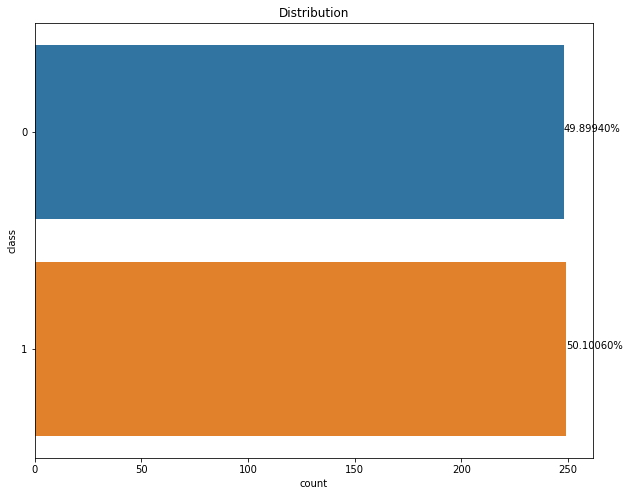

In [5]:
def value_count(df, col_name):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,8))
    ax = sns.countplot(y = col_name, data=df, orient = 'v')

    plt.title('Distribution')

    total = len(df[col_name])
    for p in ax.patches:

        percentage = '{:.5f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

    plt.show();
    
value_count(df, "class") # Balanced class count for positive and negative

##### Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. 

In [6]:
def splitting(data, split_ratio):
    
    classes = np.unique(df["class"]) # Unique values for classes
    
    train_df, valid_df = train_test_split(df, train_size = split_ratio, stratify = df["class"], random_state=42)

    return train_df, valid_df, classes

train_df, valid_df, classes = splitting(df, split_ratio = 0.7)

encoder = LabelEncoder()

train_df['class'] = encoder.fit_transform(train_df['class'].tolist())
valid_df['class'] = encoder.transform(valid_df['class'].tolist())

X_train = train_df[["feature 1", "feature 2"]]
X_test = valid_df[["feature 1", "feature 2"]]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Shape of Train :", train_df.shape)
print("Shape of Test :", valid_df.shape)

Shape of Train : (347, 3)
Shape of Test : (150, 3)


In [7]:
def modelValidator(validation, actuals, model):
    predictions = model.predict(validation)

    # Print the "two most" incorrectly classified records for each class in the test dataset.
    indices = []
    for idx, (actual, pred) in enumerate(zip(actuals, predictions)):
        indices.append((idx, actual, pred))

    indices.sort(key = lambda s:s[2], reverse=True)

    class_0, class_1 = 0, 0
    for count, values in enumerate(indices):
        if values[1] != values[2]:
            if values[1] == 0:
                if class_0 < 2:
                    class_0 += 1
                    print(f"Example misclassified for class {values[1]}")
                    print("Data :", valid_df.iloc[count])
            else:
                if class_1 < 2:
                    class_1 += 1
                    print(f"Example misclassified for class {values[1]}")
                    print("Data :", valid_df.iloc[count])
                    
        if class_0 == 2 and class_0 == 2:
            break;
    print()

    predictions = [1 if x > 0.5 else 0 for x in predictions] # Probabilities to class mapping.
    
    plt.figure(figsize=(8, 8))
    
    annot_kws = {"ha": 'left', "va": 'top'}
    sns.heatmap(confusion_matrix(actuals, predictions), 
                fmt='g', cmap='coolwarm', annot=True, 
                vmax=1.0, vmin=-1.0, linewidths=0.1,
                annot_kws=annot_kws, square=True)
    
    plt.show();
    print()
    print(classification_report(actuals, predictions))
    print()


For feature single & hidden nodes 4

Example misclassified for class 1
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    1.459411
feature 2   -3.738316
class        1.000000
Name: 411, dtype: float64
Example misclassified for class 0
Data : feature 1    0.344763
feature 2    0.294268
class        0.000000
Name: 13, dtype: float64



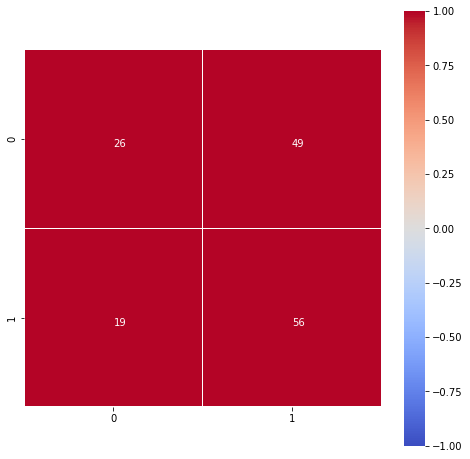


              precision    recall  f1-score   support

           0       0.58      0.35      0.43        75
           1       0.53      0.75      0.62        75

    accuracy                           0.55       150
   macro avg       0.56      0.55      0.53       150
weighted avg       0.56      0.55      0.53       150


For feature single & hidden nodes 8

Example misclassified for class 1
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    6.154680
feature 2   -1.259598
class        0.000000
Name: 244, dtype: float64
Example misclassified for class 0
Data : feature 1   -1.708271
feature 2   -0.151264
class        0.000000
Name: 63, dtype: float64



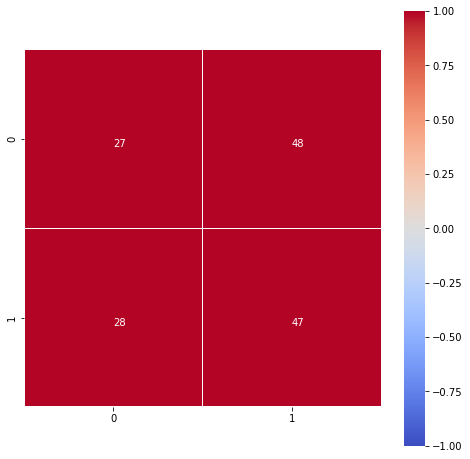


              precision    recall  f1-score   support

           0       0.49      0.36      0.42        75
           1       0.49      0.63      0.55        75

    accuracy                           0.49       150
   macro avg       0.49      0.49      0.48       150
weighted avg       0.49      0.49      0.48       150


For feature single & hidden nodes 12

Example misclassified for class 1
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    1.777157
feature 2   -2.163731
class        0.000000
Name: 106, dtype: float64
Example misclassified for class 0
Data : feature 1    1.260115
feature 2   -2.386856
class        0.000000
Name: 102, dtype: float64



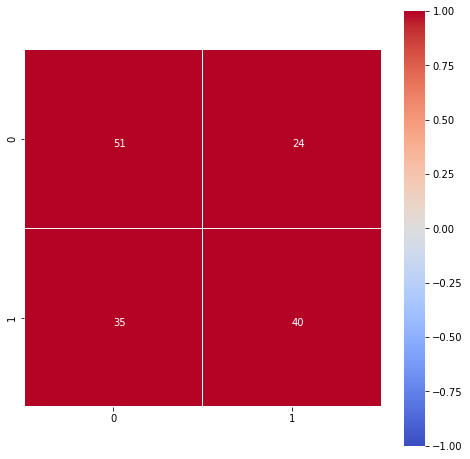


              precision    recall  f1-score   support

           0       0.59      0.68      0.63        75
           1       0.62      0.53      0.58        75

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.60       150
weighted avg       0.61      0.61      0.60       150


For feature single & hidden nodes 16

Example misclassified for class 1
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    1.260115
feature 2   -2.386856
class        0.000000
Name: 102, dtype: float64
Example misclassified for class 0
Data : feature 1    1.104988
feature 2   -0.556887
class        1.000000
Name: 301, dtype: float64



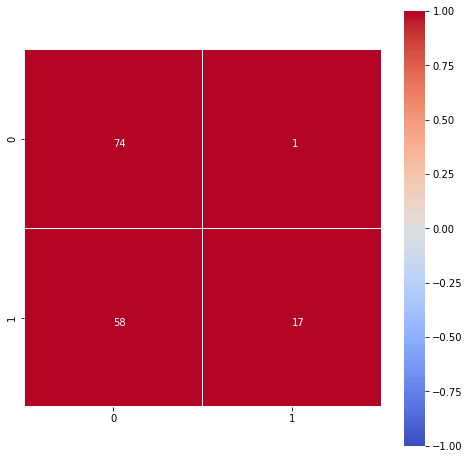


              precision    recall  f1-score   support

           0       0.56      0.99      0.71        75
           1       0.94      0.23      0.37        75

    accuracy                           0.61       150
   macro avg       0.75      0.61      0.54       150
weighted avg       0.75      0.61      0.54       150


For feature double & hidden nodes 4

Example misclassified for class 0
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    3.153244
feature 2   -0.399964
class        0.000000
Name: 121, dtype: float64



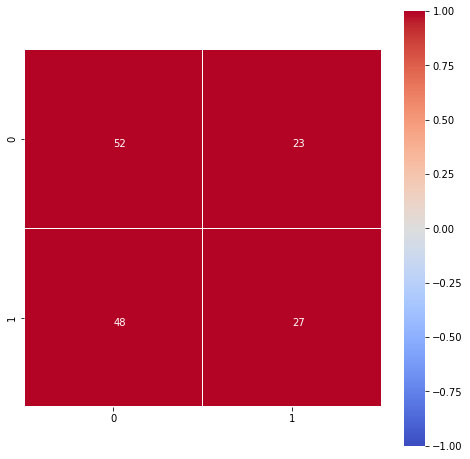


              precision    recall  f1-score   support

           0       0.52      0.69      0.59        75
           1       0.54      0.36      0.43        75

    accuracy                           0.53       150
   macro avg       0.53      0.53      0.51       150
weighted avg       0.53      0.53      0.51       150


For feature double & hidden nodes 8

Example misclassified for class 0
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    3.153244
feature 2   -0.399964
class        0.000000
Name: 121, dtype: float64



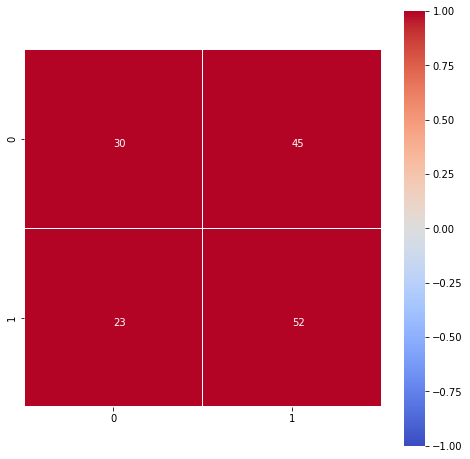


              precision    recall  f1-score   support

           0       0.57      0.40      0.47        75
           1       0.54      0.69      0.60        75

    accuracy                           0.55       150
   macro avg       0.55      0.55      0.54       150
weighted avg       0.55      0.55      0.54       150


For feature double & hidden nodes 12

Example misclassified for class 1
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 0
Data : feature 1    0.464771
feature 2   -3.859034
class        1.000000
Name: 406, dtype: float64
Example misclassified for class 0
Data : feature 1    0.074671
feature 2    0.003772
class        1.000000
Name: 249, dtype: float64



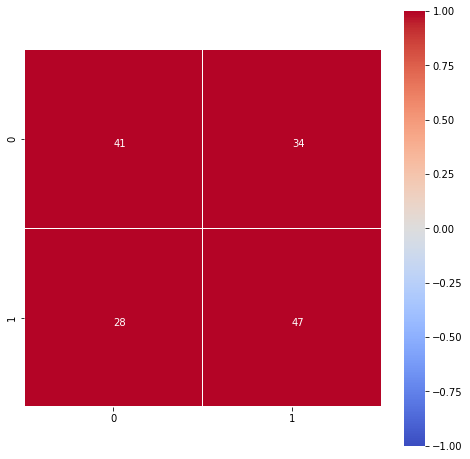


              precision    recall  f1-score   support

           0       0.59      0.55      0.57        75
           1       0.58      0.63      0.60        75

    accuracy                           0.59       150
   macro avg       0.59      0.59      0.59       150
weighted avg       0.59      0.59      0.59       150


For feature double & hidden nodes 16

Example misclassified for class 0
Data : feature 1   -5.635621
feature 2    2.078080
class        1.000000
Name: 490, dtype: float64
Example misclassified for class 1
Data : feature 1   -2.853067
feature 2   -1.671305
class        1.000000
Name: 383, dtype: float64
Example misclassified for class 1
Data : feature 1    3.153244
feature 2   -0.399964
class        0.000000
Name: 121, dtype: float64
Example misclassified for class 0
Data : feature 1    1.901024
feature 2   -2.089993
class        0.000000
Name: 107, dtype: float64



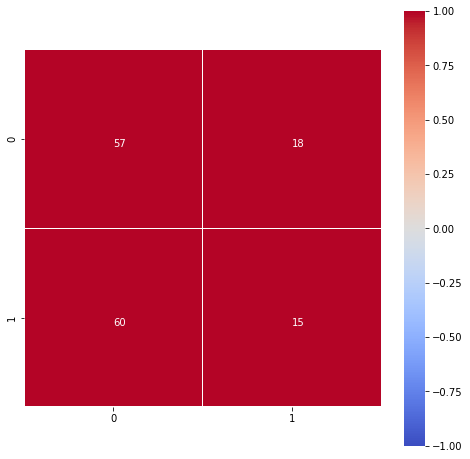


              precision    recall  f1-score   support

           0       0.49      0.76      0.59        75
           1       0.45      0.20      0.28        75

    accuracy                           0.48       150
   macro avg       0.47      0.48      0.44       150
weighted avg       0.47      0.48      0.44       150




In [8]:
def trainNeuralNtwrk(feature, nodes):
    
    print(f"For feature {feature} & hidden nodes {nodes}")
    
    model = keras.Sequential()
    if feature == 'single':
        model.add(Dense(nodes, activation='relu', input_dim = 2))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        model.add(Dense(nodes, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))

    elif feature == 'double':
        model.add(Dense(nodes, activation='relu', input_dim = 2))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        model.add(Dense(nodes, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(nodes, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                loss = tf.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.BinaryAccuracy(name='accuracy')])
  
    # model.summary();

    history = model.fit(X_train, train_df['class'], 
                      epochs=100, batch_size=16, 
                      validation_data=(X_test, valid_df['class']),
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                      verbose=0)
    
    print()
  
    return model, history

hiddenNodes = [4, 8, 12, 16]
features = ['single', 'double']
histories = {}

for feature in features:
    for nodes in hiddenNodes:
        featureName = str(feature) + "_" + str(nodes) + "_Nodes"
        model, histories[featureName] = trainNeuralNtwrk(feature, nodes)
        modelValidator(validation=X_test, actuals=valid_df['class'], model=model)

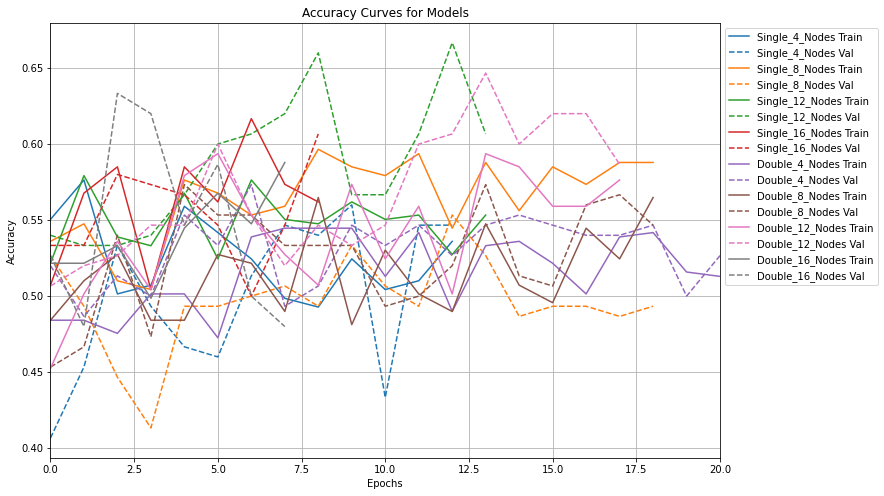

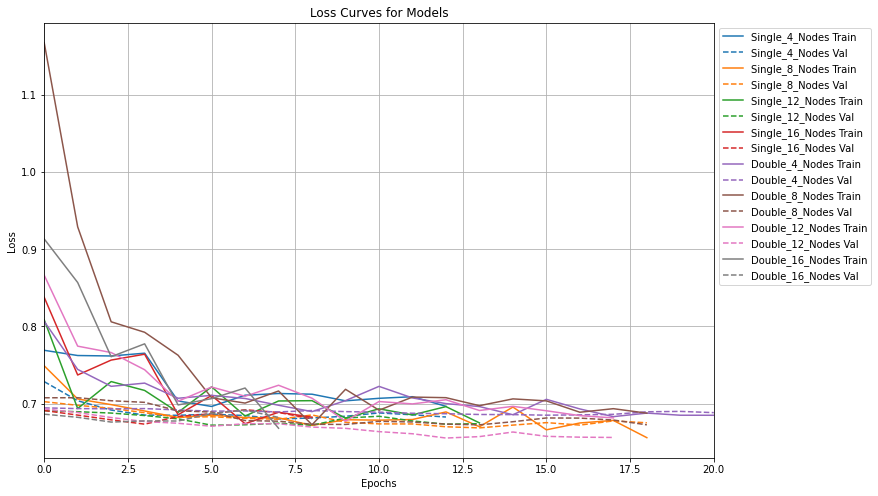

In [9]:
def plotAccuracy(histories):
    plt.rcParams['figure.figsize'] = (12, 8)
    plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
    plotter.plot(histories)
    plt.xlabel("Epochs")
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.title("Accuracy Curves for Models")
    plt.show()

def plotLosses(histories):
    plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
    plotter.plot(histories)
    plt.xlabel("Epochs")
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.title("Loss Curves for Models")
    plt.show()
    
plotAccuracy(histories)
plotLosses(histories)

#### Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 75% training and 25% validation data, appropriate learning rate, activation and loss functions. Explain the final results.

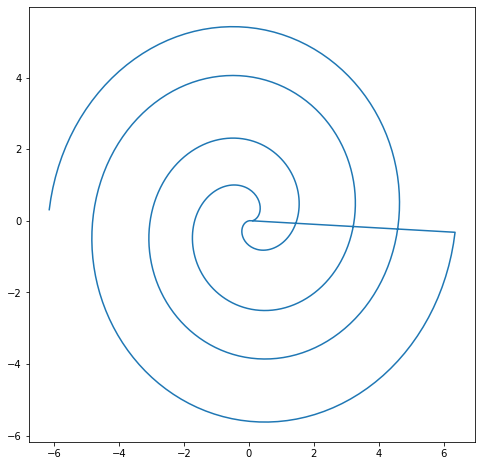

In [10]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
plt.plot(df["feature 1"], df["feature 2"])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

X = df[["feature 1", "feature 2"]]
sc = StandardScaler()
X = sc.fit_transform(X)

pca = KernelPCA(n_components = 2, kernel = 'rbf')
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC-I', 'PC-II'])
principalDf.head(3)

,PC-I,PC-II
0,-0.444324,-0.324572
1,-0.443342,-0.327109
2,-0.442727,-0.329025


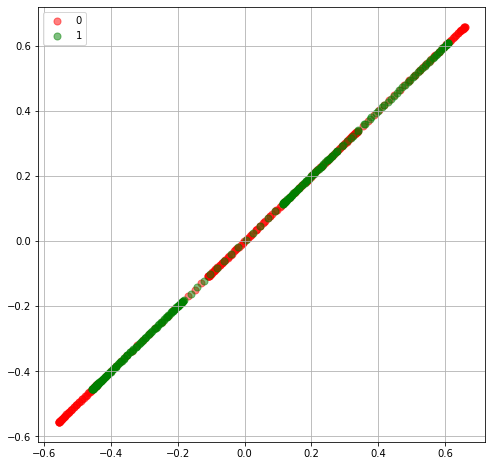

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df['class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC-I'], principalDf.loc[indicesToKeep, 'PC-I'], 
               c = color, s = 50, alpha=0.5)
ax.legend(targets);
ax.grid();
plt.show(); # No separatibility achieved via PCA .

In [13]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

df["Clusterlabels"] = labels

df.head(7)

,feature 1,feature 2,class,Clusterlabels
0,0.125074,0.006318,0,0
1,0.149702,0.015162,0,0
2,0.173691,0.026500,0,0
3,0.196854,0.040288,0,0
4,0.219006,0.056467,0,0
5,0.239964,0.074968,0,0
6,0.259552,0.095707,0,0


#### Use 75% training and 25% validation data, appropriate learning rate, activation and loss functions. Explain the final results

In [14]:
train_df_, valid_df_, classes_ = splitting(df, split_ratio = 0.75)

encoder_ = LabelEncoder()
train_df_['class'] = encoder.fit_transform(train_df_['class'].tolist())
valid_df_['class'] = encoder.transform(valid_df_['class'].tolist())

print("Shape of Train :", train_df_.shape)
print("Shape of Test :", valid_df_.shape)

Shape of Train : (372, 4)
Shape of Test : (125, 4)


In [15]:
train_df_.head(3)

,feature 1,feature 2,class,Clusterlabels
201,-3.732476,-3.616564,0,-1
450,3.588842,3.477391,1,-1
449,3.740708,3.275298,1,-1


In [16]:
train_df_['class'].value_counts()

0    186
1    186
Name: class, dtype: int64

In [17]:
def modelValidatorNewData(validation, actuals, model):
    predictions = model.predict(validation)
    predictions = np.argmax(predictions, axis=1)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(actuals, predictions), 
                fmt='g', cmap='coolwarm', annot=True, 
                vmax=1.0, vmin=-1.0, linewidths=0.1,
                annot_kws={"size": 10}, square=True);
    plt.show();
    print()
    print(classification_report(actuals, predictions))
    print()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                64        
                                                                 
 batch_normalization_20 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 113
Non-trainable params: 32
_________________________________________________________________



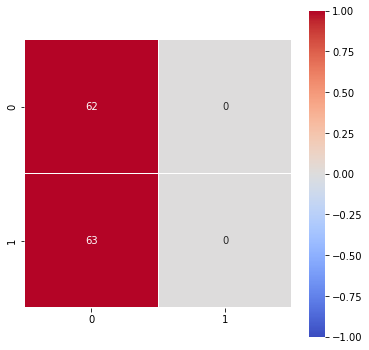


              precision    recall  f1-score   support

           0       0.50      1.00      0.66        62
           1       0.00      0.00      0.00        63

    accuracy                           0.50       125
   macro avg       0.25      0.50      0.33       125
weighted avg       0.25      0.50      0.33       125




In [18]:
def trainSeparatedDataNtwrk():

    input_dim = train_X.shape[1]
    
    model = keras.Sequential()
    model.add(Dense(16, activation='relu', input_dim = input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                loss = tf.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.BinaryAccuracy(name='accuracy')])

    history = model.fit(X_train, train_df_['class'], 
                      epochs=100, batch_size=16, 
                      validation_data=(X_test, valid_df_['class']),
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                      verbose=0)
    
    model.summary();
    print()
    return model, history

train_X = train_df_[["feature 1", "feature 2", "Clusterlabels"]]
valid_X = valid_df_[["feature 1", "feature 2", "Clusterlabels"]]

mx = MinMaxScaler()
X_train = mx.fit_transform(train_X)
X_test = mx.transform(valid_X)

model_, histories[featureName] = trainSeparatedDataNtwrk()
modelValidatorNewData(validation=X_test, 
                      actuals=valid_df_['class'], 
                      model=model_)

#### Points to mention:
- Adam was used for it"s momentum based approach to help with gradient descent.
- Callbacks were added to ensure if model doesn"t learn then it doesn"t consume compute & we end the compilation.
- Activation of ReLu was used(LeakyReLu would have been better).
- learning_rate=0.005(balanced) was used for Adam, clipnorm could have been used with conjunction is exploding gradients were seen from the loss curves.
- More time to be spent on feature engineering to ensure separatibility of the data.

#### Observations:
- The model with density based feature performed even poorly.
- Double layer with 12 nodes performed the best.
- Kernel PCA using rbf kernel didn't help with separatibility of classes.
- Even density based modeling failed.
- The attached [link](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0.003&noise=0&networkShape=8,6,2&seed=0.94107&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&discretize_hide=false) gives a preview of the same using Tensorflow Playground.